# Importação de Bibliotecas básicas

In [2]:
import bs4 as bs
import urllib.request
import nltk
import spacy

###### - POS (part-of-speech) atribui para as palavras partes da fala, como substantivos, adjetivos, verbos
###### - Importante para a detecção de entidades no texto, pois primeiro é necessário saber o que o texto contém
###### - Lista de tokens: https://spacy.io/api/annotation#pos-tagging
###### - Português: https://www.sketchengine.eu/portuguese-freeling-part-of-speech-tagset/

In [11]:
!python3 -m spacy download pt_core_news_sm

2022-07-29 19:50:08.560988: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.0 MB 20.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [12]:
pln = spacy.load('pt_core_news_sm')
documento = pln('Estou aprendendo processamento de linguagem natural, curso em Rio de Janeiro')

In [13]:
for token in documento:
   print(token.text, token.pos_)

Estou AUX
aprendendo VERB
processamento NOUN
de ADP
linguagem NOUN
natural ADJ
, PUNCT
curso NOUN
em ADP
Rio PROPN
de ADP
Janeiro PROPN


# Lematização e stemização

## Lematização

In [14]:
for token in documento:
   print(token.text, token.lemma_)


Estou estar
aprendendo aprender
processamento processamento
de de
linguagem linguagem
natural natural
, ,
curso curso
em em
Rio Rio
de de
Janeiro Janeiro


In [15]:
doc = pln('encontrei encontraram encontrarão encontrariam cursando curso cursei')
print([token.lemma_ for token in doc])

['encontrar', 'encontrar', 'encontrar', 'encontrar', 'cursar', 'curso', 'cursei']


## Stemização

In [16]:
## Stemização

In [17]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [18]:
stemmer =  nltk.stem.RSLPStemmer()
print(stemmer.stem('aprender'))

aprend


In [19]:
for token in documento:
   print(token.text, token.lemma_,stemmer.stem(token.text))

Estou estar est
aprendendo aprender aprend
processamento processamento process
de de de
linguagem linguagem lingu
natural natural natur
, , ,
curso curso curs
em em em
Rio Rio rio
de de de
Janeiro Janeiro jan


# Carregamento dos textos

In [21]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Intelig%C3%AAncia_artificial')
dados = dados.read()
dados_html = bs.BeautifulSoup(dados, 'lxml')
paragrafos = dados_html.find_all('p') 
print(paragrafos[7].text)

Na tecnologia, a Inteligência Artificial (de sigla: IA; do inglês: Artificial Intelligence, de sigla: AI) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes[1], além de também ser um campo de estudo acadêmico,[2] onde o principal objetivo é de executar funções de modo autônomo que. 



In [22]:
conteudo = ''
for p in paragrafos:
    conteudo += p.text

In [23]:
conteudo = conteudo.lower()
print(conteudo)


		páginas para editores conectados saiba mais

navegação

colaboração

ferramentas

imprimir/exportar

noutros projetos
conteúdona tecnologia, a inteligência artificial (de sigla: ia; do inglês: artificial intelligence, de sigla: ai) é a inteligência demonstrada por máquinas ao executar tarefas complexas associadas a seres inteligentes[1], além de também ser um campo de estudo acadêmico,[2] onde o principal objetivo é de executar funções de modo autônomo que. 
é um conceito amplo e que recebe tantas definições quanto significados diferentes à palavra inteligência.[3] é possível considerar algumas características básicas desses sistemas, como a capacidade de raciocínio (aplicar regras lógicas a um conjunto de dados disponíveis para chegar a uma conclusão), aprendizagem (aprender com os erros e acertos para que no futuro possa agir de maneira mais eficaz), reconhecer padrões (tanto padrões visuais e sensoriais, como também padrões de comportamento) e inferência (capacidade de conseguir 

# Buscas em Texto com Spacy

In [24]:
pln = spacy.load('pt_core_news_sm')

string = 'turing'
token_pesquisa = pln(string)

In [25]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add('SEARCH',None,token_pesquisa)

In [26]:
doc = pln(conteudo)
matches = matcher(doc)

In [27]:
matches

[(8661325627334373315, 3037, 3038),
 (8661325627334373315, 3047, 3048),
 (8661325627334373315, 3203, 3204),
 (8661325627334373315, 3208, 3209),
 (8661325627334373315, 3214, 3215),
 (8661325627334373315, 3277, 3278),
 (8661325627334373315, 3904, 3905),
 (8661325627334373315, 5169, 5170),
 (8661325627334373315, 8620, 8621),
 (8661325627334373315, 8755, 8756),
 (8661325627334373315, 8850, 8851),
 (8661325627334373315, 8967, 8968)]

In [47]:
doc[3037-5:3038+5]

uma contribuição prática de alan turing foi o que se chamou

In [52]:
doc[8917: 8968+50]

a sua inteligência e via o cérebro como uma máquina cujo funcionamento pode ser estudado e reproduzido num computador, o que poderia ajudar a compreender melhor o cérebro humano e as funções mentais superiores.
informático indiano naturalizado estadunidense, foi o primeiro asiático a vencer o prêmio turing. entre suas contribuições para a ia estão a criação do instituto de robótica da cmu e demonstrações de diversos sistemas que usam alguma forma de ia. entre esses sistemas, estão sistemas de: fala, controlados por voz, reconhecimento de voz, reconhecimento de voz independente

In [50]:
matches[11][2]

8968

In [51]:
matches[11][1] - 50

8917

In [56]:
from IPython.core.display import HTML
texto = ''
numero_palavras = 50 
doc = pln(conteudo)
matches = matcher(doc)

display(HTML(f'<h1>{string.upper()}</h1>'))
display(HTML(f'''<p><strong>Resultados Encontrados: </strong> {len(matches)} </p>'''))

for i in matches:
  inicio = i[1] - numero_palavras
  if inicio < 0:
     inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f'<mark>{string}</mark>')
  texto += "<br/><br/>"
display(HTML(f'''... {texto} ...'''))



# Extração de entidades nomeadas

- NER (Named-Entity Recognition)
- Encontrar e classificar entidades no texto, dependendo da base de dados que foi utilizada para o treinamento (pessoa, localização, empresa, numéricos)
- Usado em chatbots para saber o assunto falado
- Siglas: https://spacy.io/api/annotation#named-entities

In [57]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

segunda guerra mundial MISC
computing machinery and intelligence" do matemático MISC
herbert simon PER
allen newell PER
john mccarthy PER
warren mcculloch PER
walter pitts PER
marvin minsky PER
google ORG
john mccarthy PER
herbert simon PER
john mccarthy PER
newell PER
brasil LOC
allen newell PER
herbert simon PER
mit ORG
darthmouth LOC
japão LOC
andreas kaplan PER
john PER
john PER
good MISC
w. grey walter PER
besta de johns hopkins ORG
universidade de princeton LOC
ratio club LOC
inglaterra LOC
david rumelhart PER
isaac PER
steven spielberg PER
stephen hawking PER
alan turing PER
turing PER
turing PER
turing PER
java MISC
john searle PER
hubert PER
searle PER
minsky PER
turing PER
mit ORG
mark i PER
frank rosenblatt PER
charles wightman PER
jean-françois lyotard LOC
lucien sfez PER
daniel dennett PER
dennett PER
simon blackburn PER
searle - PER
minsky PER
minsky PER
rosenblatt PER
bernard widrow PER
minsky PER
allen newell PER
herbert simon PER
lisp MISC
mit ORG
seymour papert PER
te

In [58]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

# Nuvem de palavras e stop words

In [66]:
from spacy.lang.pt.stop_words import STOP_WORDS
len(STOP_WORDS)

416

In [67]:
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)

In [69]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [70]:
len(lista_token), len(sem_stop)

(9892, 5788)

In [71]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [72]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words=100, colormap = color_map)

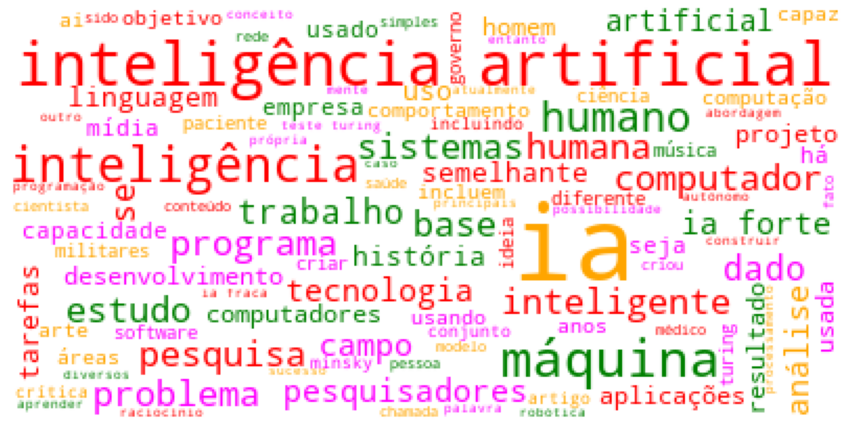

In [75]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()